### Dog and Cat classification project

In this project, I have used a dataset of 25,000 images of dog and cat downloaded from internet. Those images are divided into 2 folders which are "train" folder and "test" folder, each folder then is divided into 2 categories which are "CAT" and "DOG".

At the end, my model achived a pretty well accuracy of 87.8%

### Visualizing the Data

In [6]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

%matplotlib inline

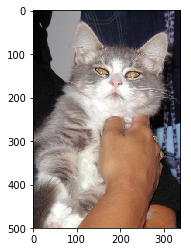

In [14]:
# Show a random images from CAT category 

rand = np.random.randint(0,9373)


cat_rand=cv2.imread("CATS_DOGS/train/CAT/{}.jpg".format(str(rand)))
cat_rand=cv2.cvtColor(cat_rand,cv2.COLOR_BGR2RGB)
plt.imshow(cat_rand)

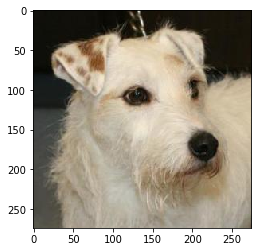

In [15]:
# Show a random images from CAT category 

dog_rand=cv2.imread("CATS_DOGS/train/DOG/{}.jpg".format(str(rand)))
dog_rand=cv2.cvtColor(dog_rand,cv2.COLOR_BGR2RGB)
plt.imshow(dog_rand)

### Import ImageDataGenerator from Keras to pre-process our input images for the model

In [8]:
from keras.preprocessing.image import ImageDataGenerator, load_img
"""
rotation_range=30: randomly rotate image angle from 0 to 30 degree
width_shift_range=0.1: randomly stretch the image along x_axis from 0 to 10%
height_shift_range=0.1: randomly stretch the image along y_axis from 0 to 10%
rescale=1/255: rescale image to the range from 0 to 1
shear_range=0.2: randomly crop the image from 0 to 20%
zoom_range=0.2: randomly zoom the image from 0 to 20%
horizontal_flip=True: randomly flip the image in horizontal direction
fill_mode="nearest": During the random image processing, we will fill in the mixing pixels with the nearset ones if they are missing 
"""
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode="nearest")

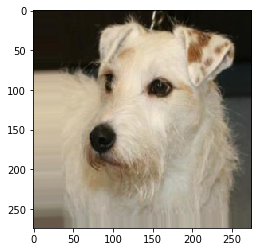

In [17]:
plt.imshow(image_gen.random_transform(dog_rand))

In [18]:
image_gen.flow_from_directory("CATS_DOGS/train")

Found 18743 images belonging to 2 classes.


In [0]:
input_shape = (128,128,3)

### Create model and layers

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [66]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_25 (Batc (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_26 (Batc (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 30, 30, 64)      

In [67]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory("CATS_DOGS/train/",
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode="categorical")

Found 18743 images belonging to 2 classes.


In [68]:
test_image_gen = image_gen.flow_from_directory("CATS_DOGS/test/",
                                                target_size=input_shape[:2],
                                                batch_size=batch_size,
                                                class_mode="categorical")

Found 6251 images belonging to 2 classes.


### Train and save my model

In [69]:
results=model.fit_generator(train_image_gen,epochs=50,steps_per_epoch=len(train_image_gen),
                           validation_data=test_image_gen,validation_steps=len(test_image_gen))

Epoch 1/50
 108/1172 [=>............................] - ETA: 2:52 - loss: 1.1958 - acc: 0.5625

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but 

 344/1172 [=======>......................] - ETA: 1:56 - loss: 0.9835 - acc: 0.5725

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting t

 482/1172 [===========>..................] - ETA: 1:35 - loss: 0.9130 - acc: 0.5812

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293863424 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expect

 645/1172 [===============>..............] - ETA: 1:12 - loss: 0.8503 - acc: 0.5966

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262146 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 262151 bytes but only got 0. Skipping tag 56
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))


 668/1172 [================>.............] - ETA: 1:08 - loss: 0.8425 - acc: 0.5987

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 209715200 bytes but only got 0. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 52428800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6468665344 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 7027. Skipping tag 48
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expe

 683/1172 [================>.............] - ETA: 1:06 - loss: 0.8383 - acc: 0.5995

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18350080 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:742: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 6. 
  warnings.warn(str(msg))


 976/1172 [=======================>......] - ETA: 26s - loss: 0.7749 - acc: 0.6196

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307363840 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 307888128 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 328728576 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 5357. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expe

1172/1172 [==============================] - 200s 170ms/step - loss: 0.7458 - acc: 0.6294 - val_loss: 0.5967 - val_acc: 0.6748
Epoch 2/50
1172/1172 [==============================] - 196s 167ms/step - loss: 0.5710 - acc: 0.7057 - val_loss: 0.5308 - val_acc: 0.7370
Epoch 3/50
1172/1172 [==============================] - 195s 167ms/step - loss: 0.5228 - acc: 0.7460 - val_loss: 0.5359 - val_acc: 0.7348
Epoch 4/50
1172/1172 [==============================] - 196s 167ms/step - loss: 0.4910 - acc: 0.7688 - val_loss: 0.5428 - val_acc: 0.7338
Epoch 5/50
1172/1172 [==============================] - 196s 168ms/step - loss: 0.4566 - acc: 0.7899 - val_loss: 0.4741 - val_acc: 0.7773
Epoch 6/50
1172/1172 [==============================] - 196s 167ms/step - loss: 0.4371 - acc: 0.7987 - val_loss: 0.5090 - val_acc: 0.7751
Epoch 7/50
1172/1172 [==============================] - 196s 167ms/step - loss: 0.4233 - acc: 0.8086 - val_loss: 0.4944 - val_acc: 0.7820
Epoch 8/50
1172/1172 [=======================

In [0]:
model.save("Dog_cat_classification.h5")

### Visualize my result

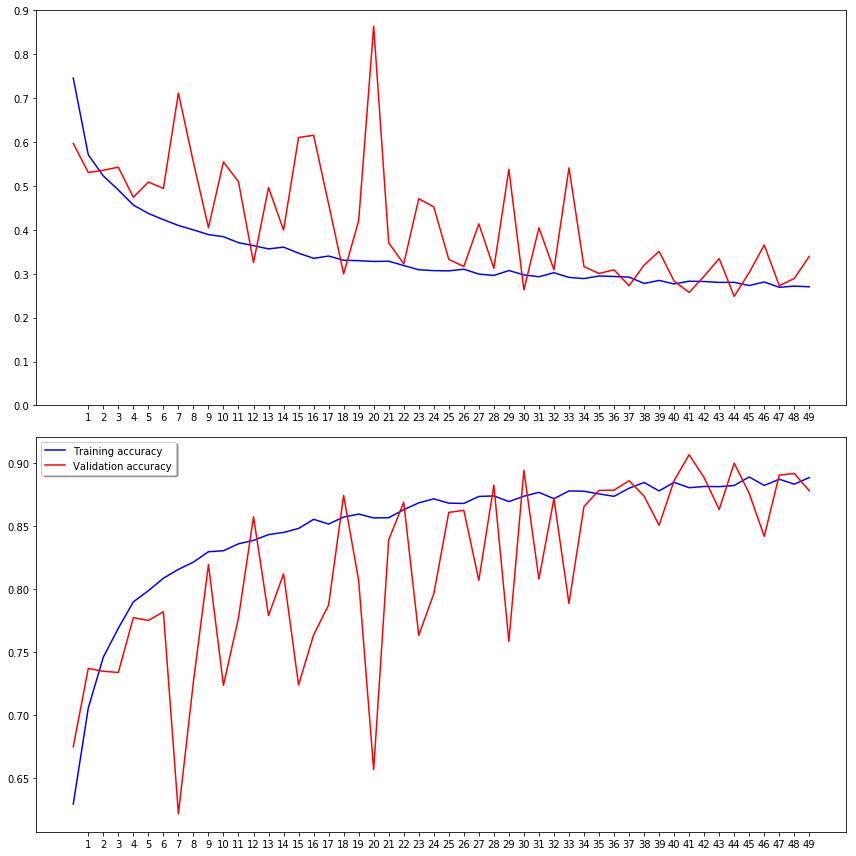

In [78]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(results.history['loss'], color='b', label="Training loss")
ax1.plot(results.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, 50, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(results.history['acc'], color='b', label="Training accuracy")
ax2.plot(results.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, 50, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

### Load my model and predicting on new images. I used the test images from Kaggle which my model have never ever seen before

In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [2]:
model = load_model("Dog_cat_classification.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [3]:
import numpy as np

def show_result(test_image):
    test_image = cv2.imread("CATS_DOGS/test_random/test1/{}".format(test_image))
    test_image = cv2.resize(test_image,(128,128))
    test_image = test_image/255
    test_image = test_image.reshape(1,128,128,3)
    
    prediction = model.predict_classes(test_image)
    prediction_prob = model.predict(test_image)
    
    if prediction.max()==1:
        return "DOG"
    else:
        return "CAT"

In [4]:
import os
test_random = os.listdir("CATS_DOGS/test_random/test1/")

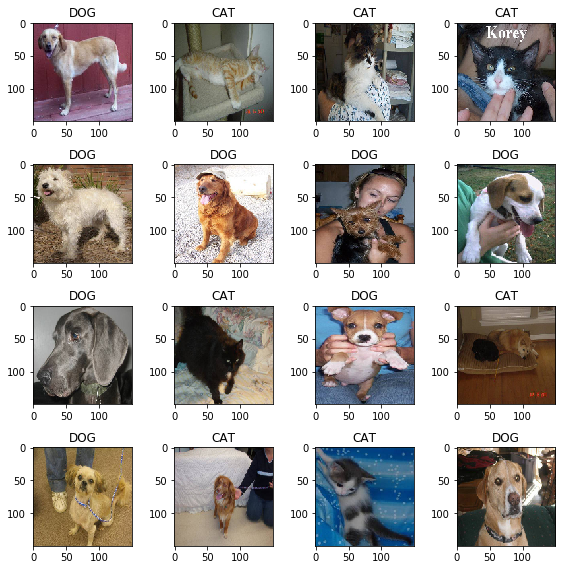

In [9]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 4
fig_list= []

for i in range(1, columns*rows +1):
    rand = np.random.randint(6251)
    fig_list.append(fig.add_subplot(rows, columns, i))
    fig_list[-1].set_title(show_result(test_random[rand]))
    img = load_img("CATS_DOGS/test_random/test1/{}".format(test_random[rand]),target_size=(150,150))
    plt.imshow(img)
    
plt.tight_layout(True)   
plt.show()

## The end!